In [182]:
import sqlite3
from sqlite3 import Error

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

# 1. Loading the Data

In [183]:
con = sqlite3.connect("data/attrition.db")


In [184]:
df = pd.read_sql_query("SELECT * from attrition", con)

In [185]:
con.close()

# 2. Understanding the Data

- from df.info(), we can see that there are 2470 values, and no null values (no need to replace null values)
- there are 7 categorical values and 7 numerical values

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Member Unique ID  2470 non-null   object
 1   Attrition         2470 non-null   int64 
 2   Age               2470 non-null   int64 
 3   Gender            2470 non-null   object
 4   Monthly Income    2470 non-null   int64 
 5   Travel Time       2470 non-null   object
 6   Qualification     2470 non-null   object
 7   Work Domain       2470 non-null   object
 8   Usage Rate        2470 non-null   int64 
 9   Branch            2470 non-null   object
 10  Membership        2470 non-null   object
 11  Months            2470 non-null   int64 
 12  Birth Year        2470 non-null   int64 
 13  Usage Time        2470 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 270.3+ KB


In [187]:
df.head(3)

,Member Unique ID,Attrition,Age,Gender,Monthly Income,Travel Time,Qualification,Work Domain,Usage Rate,Branch,Membership,Months,Birth Year,Usage Time
0,1d172e75-2c13-4b73-a1da-18d442a10bf7,1,41,Female,5993,0.2 hours,Diploma,Engineering,2,Changi,Gold,7,1981,7
1,6dee0995-9ff1-44a6-b3f1-fc5f7270c8ab,0,49,Male,5130,0.7 hours,Diploma,Engineering,3,Thomson,Normal,11,1973,2
2,c9fff882-42e7-4e12-88ab-74aba95113dc,1,37,Male,2090,20.0 mins,Diploma,Medical,4,Thomson,Normal,1,1985,2


In [188]:
num_cols = [c for c in df.columns if df[c].dtypes !='O']
cat_cols = [c for c in df.columns if df[c].dtypes == 'O']
print(f"numerical columns: {len(num_cols)}")
print(f"categorical columns: {len(cat_cols)}")

numerical columns: 7
categorical columns: 7


In [189]:
df[num_cols].isnull().mean().sort_values()

Attrition         0.0
Age               0.0
Monthly Income    0.0
Usage Rate        0.0
Months            0.0
Birth Year        0.0
Usage Time        0.0
dtype: float64

In [190]:
df[cat_cols].isnull().mean().sort_values()

Member Unique ID    0.0
Gender              0.0
Travel Time         0.0
Qualification       0.0
Work Domain         0.0
Branch              0.0
Membership          0.0
dtype: float64

In [191]:
df[num_cols].describe()

,Attrition,Age,Monthly Income,Usage Rate,Months,Birth Year,Usage Time
count,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000
mean,0.169636,35.970850,5143.199595,2.780972,10.634413,1734.040486,4.846964
std,0.375388,16.757217,6542.273046,1.033757,9.225734,655.077597,3.925911
min,0.000000,-1.000000,-24620.000000,1.000000,0.000000,-1.000000,0.000000
25%,0.000000,29.000000,2610.000000,2.000000,5.000000,1969.000000,2.000000
50%,0.000000,38.000000,4785.000000,3.000000,8.000000,1980.000000,4.000000
75%,0.000000,48.000000,7981.750000,4.000000,13.000000,1988.000000,6.000000
max,1.000000,69.000000,25326.000000,4.000000,57.000000,2004.000000,20.000000


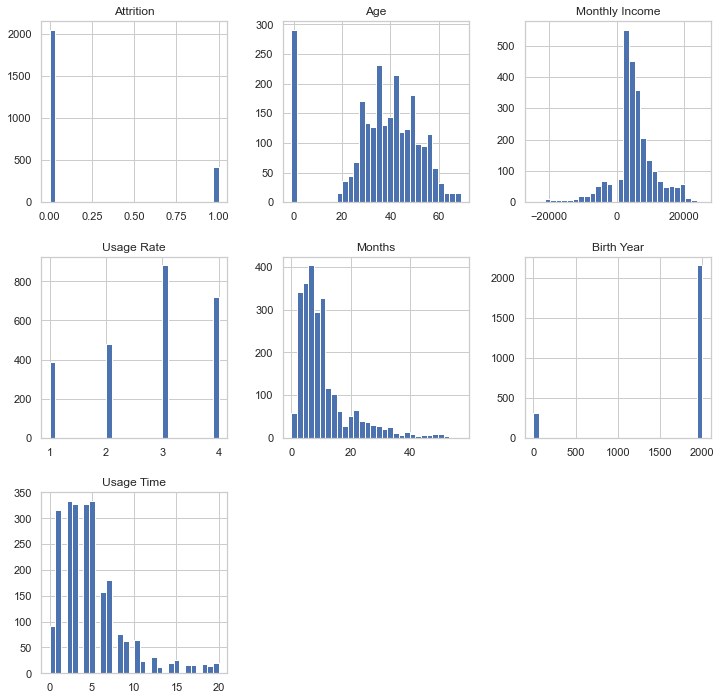

In [192]:
#distribution of numerical columns
df[num_cols].hist(bins=30, figsize = (12,12))
plt.show()

#observations:
# negative values in age and montly income and birth year
# about 20% users have quit the club
#most users are members for less than 10 months
# most users go to the club around 3 times a week
#usage time mostly around 0-5hours

In [193]:
#removing memeber unique id and travel time because member unique id is a identifier and travel time needs to be preprocessed
#travel time should be a numerical value
cat_cols.remove('Member Unique ID')
cat_cols.remove('Travel Time')

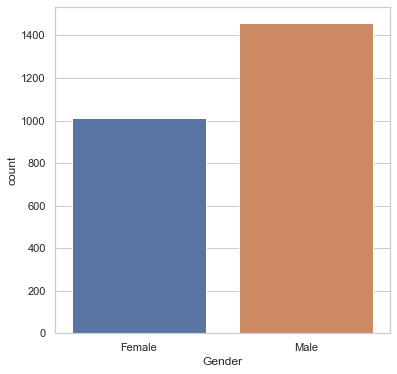

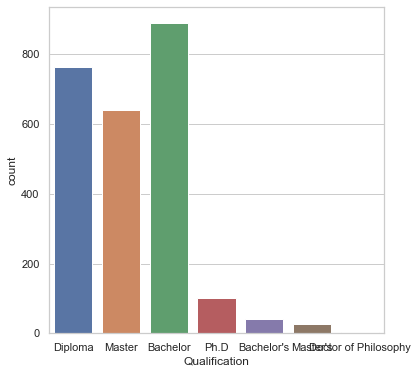

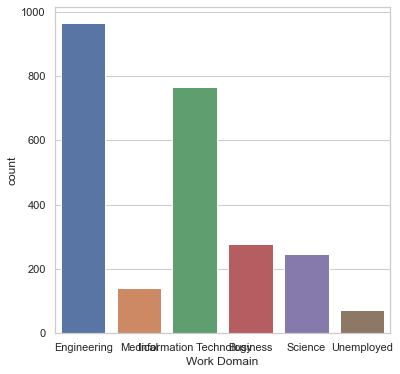

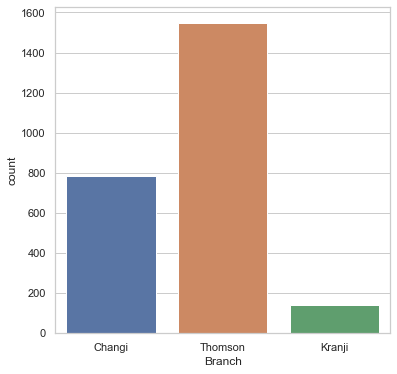

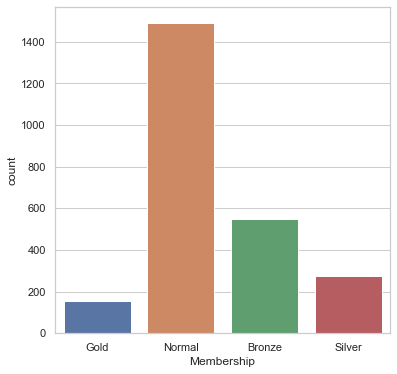

In [194]:
for cat in cat_cols:
    plt.figure(figsize=(6,6))
    sns.countplot(x=cat, data=df)
    plt.show()
    
    
#observations:
# more male than female users
# mostly bachelors
#mostly engineers
# thompson branch has the most users
#most people are normal memebership holders

# 3. Cleaning the data

## 3.1 Making the Values in the `Qualification` field consistent

In [195]:
df['Qualification'].value_counts()

Bachelor                891
Diploma                 765
Master                  641
Ph.D                    100
Bachelor's               41
Master's                 27
Doctor of Philosophy      5
Name: Qualification, dtype: int64

In [196]:
df.replace({'Qualification': {"Bachelor's" : 'Bachelor', "Master's" : 'Master', 'Doctor of Philosophy' : "Ph.D"}}, inplace = True)

In [197]:
df['Qualification'].value_counts()

Bachelor    932
Diploma     765
Master      668
Ph.D        105
Name: Qualification, dtype: int64

## 3.2 Replacing the negative values in the `Birth Year` and `Age` columns

In [198]:
df[(df['Birth Year']< 0)]

,Member Unique ID,Attrition,Age,Gender,Monthly Income,Travel Time,Qualification,Work Domain,Usage Rate,Branch,Membership,Months,Birth Year,Usage Time
8,fc861dd7-6ec7-4d80-a9a3-34177d787e35,0,38,Male,9526,0.8 hours,Bachelor,Engineering,4,Thomson,Normal,10,-1,5
11,ae82c9c1-bf6a-4290-bca7-bc32d90de4de,0,29,Female,4193,40.0 mins,Diploma,Engineering,4,Thomson,Normal,10,-1,4
38,be64c37b-7e52-44a8-a035-4d5f97542646,0,36,Female,-3419,30.0 mins,Master,Engineering,2,Thomson,Silver,2,-1,1
41,7014069c-754a-4932-a012-fffd484ea03d,0,27,Female,2341,0.3 hours,Master,Engineering,4,Thomson,Normal,2,-1,1
66,81972862-87b5-454b-a365-62fde18c6962,0,36,Male,6499,0.7 hours,Bachelor,Engineering,2,Thomson,Normal,7,-1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,86302c70-b22c-418b-b201-a673df95fc5c,1,55,Female,7916,0.4 hours,Bachelor,Science,2,Kranji,Gold,25,-1,6
2446,f48303bd-7618-46ed-81a5-21243c0a35e9,1,28,Female,6068,0.9 hours,Master,Engineering,3,Changi,Normal,3,-1,4
2457,798be702-967b-478d-9521-015f57c4adeb,0,54,Male,-6183,32.36576572816357 mins,Master,Information Technology,4,Thomson,Normal,45,-1,2
2460,c0e17350-b8f5-4b9c-8a60-531c74909677,0,67,Male,4127,12.434043010881483 mins,Master,Science,3,Thomson,Gold,16,-1,1


In [199]:
df[(df['Age']< 0)]

,Member Unique ID,Attrition,Age,Gender,Monthly Income,Travel Time,Qualification,Work Domain,Usage Rate,Branch,Membership,Months,Birth Year,Usage Time
7,b2982dcd-9e6e-41d4-b1ac-fe59d4716d6c,0,-1,Male,2693,50.0 mins,Diploma,Engineering,4,Thomson,Normal,2,1992,2
26,6f0d4708-10c7-4345-baca-1cb8930cb5a9,1,-1,Female,-3919,50.0 mins,Diploma,Engineering,2,Thomson,Normal,11,1990,5
29,a816ea53-b6f7-4656-92d4-58289014a40e,0,-1,Female,-18947,0.3 hours,Master,Business,2,Changi,Bronze,3,1976,7
42,551ae7ce-4ecf-424b-8ee9-0a1fa33321d5,1,-1,Male,2293,0.8 hours,Bachelor,Engineering,1,Thomson,Bronze,2,1996,10
44,54a0180b-bc66-49ad-938b-ea5fb6d81c0d,0,-1,Female,4011,0.2 hours,Diploma,Information Technology,3,Thomson,Normal,13,1992,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393,e55916ea-0251-4dca-b7f1-2312f112d23e,0,-1,Male,11416,0.5 hours,Diploma,Business,4,Thomson,Silver,5,1977,1
2399,2d962c86-e66b-42a4-a3a4-dbb770787bad,1,-1,Female,3760,13.704497362604137 mins,Bachelor,Unemployed,2,Changi,Bronze,37,1967,8
2442,5ed258d6-4746-4531-9fe4-ce5adc1d580d,0,-1,Male,3628,0.5 hours,Master,Engineering,3,Thomson,Normal,41,1971,2
2454,99069ddd-1730-41db-9779-9c24ca7c6ebc,0,-1,Male,-3004,0.4 hours,Master,Engineering,3,Changi,Normal,23,1971,1


In [200]:
df[(df['Age']< 0) & (df['Birth Year']< 0)]
# no values with  negative Age and Birth Year so we can use the columns to populate missing values for each other

,Member Unique ID,Attrition,Age,Gender,Monthly Income,Travel Time,Qualification,Work Domain,Usage Rate,Branch,Membership,Months,Birth Year,Usage Time


In [201]:
def yearSinceSignUp(row):
    year = round(int(row['Months']) / 12)
    return year

In [202]:
#create a column to convert column months to years
df['Time_since_signup_in_years'] = df.apply(yearSinceSignUp, axis=1)

In [203]:
#clean up Age column by subtracting the number years since sign up and birth year to get the age the user first signed up
df['Age'] = df.apply(lambda x: (2022- x['Birth Year'] - x['Time_since_signup_in_years']) if x.Age < 0 else x.Age, axis=1)

In [204]:
#clean up year column by taking this year - (age first signed up + years as member) to get the birth year
df['Birth Year'] = df.apply(lambda x:  (2022 - (x['Age'] + x['Time_since_signup_in_years'])) if x['Birth Year'] < 0 else x['Birth Year'], axis=1)

In [212]:
df.drop(['Time_since_signup_in_years'], axis=1, inplace = True)

## 3.3 Clean up `Travel Time` Column

In [205]:
def travel_time_type(row):
    type = row.split(" ")[1]
    value = float(row.split(" ")[0])
    if type == 'hours':
        time = value * 60
        return round(time)
    else:
        return round(value)
        

In [206]:
df['Travel Time'] = df['Travel Time'].apply(travel_time_type)

## 3.4 Removing negative values in `Montly Income` column

In [207]:
#assumption that there is no negative income (and the negative was an error)
df['Monthly Income'] = df['Monthly Income'].abs()

## 3.5 Changing `Qualification` column to numerical values

In [208]:
def Qualification_to_num(row):
    val_num = np.nan
    x = row['Qualification']
    if x == "Diploma":
        val_num = 1
    elif x == "Bachelor":
        val_num = 2
    elif x == "Master":
        val_num = 3
    elif x == "Ph.D":
        val_num = 4
    return val_num
        
df['Qualification'] = df.apply(Qualification_to_num, axis=1)

## 3.6 Changing `Membership` column to numerical values

In [209]:
def Membership_to_num(row):
    val_num = np.nan
    x = row['Membership']
    if x == "Normal":
        val_num = 1
    elif x == "Bronze":
        val_num = 2
    elif x == "Silver":
        val_num = 3
    elif x == "Gold":
        val_num = 4
    return val_num

df['Membership'] = df.apply(Membership_to_num, axis=1)

In [210]:
#df.drop(['Qualification_numerized','Membership_numerized'], axis = 1, inplace =True)

In [211]:
for col in df:
    print(col)
    print(df[col].unique())
    print()
    print()

Member Unique ID
['1d172e75-2c13-4b73-a1da-18d442a10bf7'
 '6dee0995-9ff1-44a6-b3f1-fc5f7270c8ab'
 'c9fff882-42e7-4e12-88ab-74aba95113dc' ...
 'df9097af-60f5-4654-b479-75ce35ef2c9b'
 '5675bfe3-c90a-47bb-b6c2-5d6e2005ef54'
 '2a7a16fb-d1dd-46d9-a3ad-4f5f7c3c0d3c']


Attrition
[1 0]


Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 52 57 18 47 60 62 64 68 63 66
 65 67 61 69 12 17 15]


Gender
['Female' 'Male']


Monthly Income
[ 5993  5130  2090 ... 11845 12579  3938]


Travel Time
[12 42 20 18 50 48 40 30 10 22 54  6 24 33 53 52 41 31 51 15 49 32 19 23
 21 14 29 39 13 11 43  9 16 36  8  7 55 17]


Qualification
[1 3 2 4]


Work Domain
['Engineering' 'Medical' 'Information Technology' 'Business' 'Science'
 'Unemployed']


Usage Rate
[2 3 4 1]


Branch
['Changi' 'Thomson' 'Kranji']


Membership
[4 1 2 3]


Months
[ 7 11  1  9  3  8  2 10  6  5 26  4 13 15 23 16 28 22 18 12 14 38 17 21
 41 25 34 20 37 19 30 32 33 35 27 3

In [245]:
df_attr = df[(df['Attrition']==1)]

# 4. Visulisation of Data

## 4.1 Correlation

<AxesSubplot:>

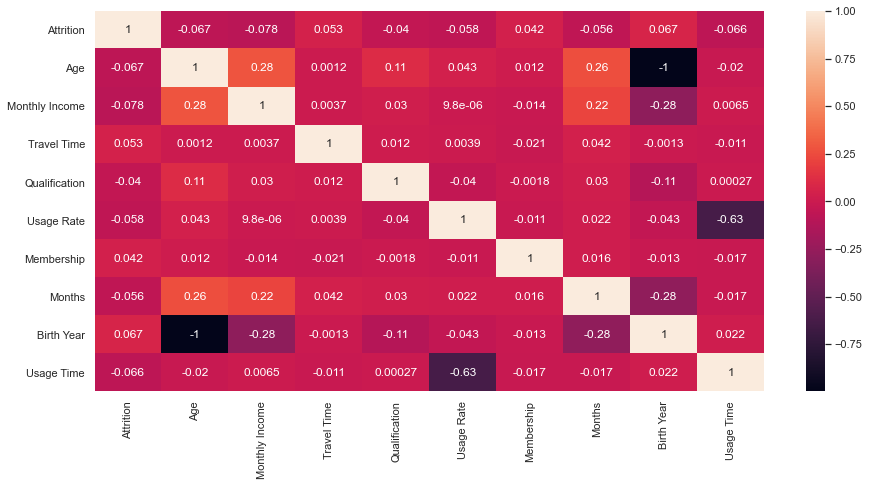

In [213]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True) 
#observations:
#travel time, membership, birthyear positively correlated with attrition rate 
#(i.e the longer the travel time/the higher the membership tier/ the younger the memeber, the likihood of quiting is higher
# Age Montly income, Qualtification, Usage rate, Usage Time, months negatively corretlated with Attrition
#this means hight income/ higher qualificatiions, higher usage rate, higher usage time means users are less likely to quit the club

# other interesting observations:
#- Usage rate and Usage time are negatively corelated (i,e, if user go to the club less times a week they will stay at the club longer)
# the more money a user earns the more likely they will stay as a member longer

## 4.2 Uni-variate Analysis

In [214]:
sns.set_palette("Spectral")

In [215]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

In [218]:
def plotpie(col):
    
    value = df[col].value_counts()
    label_value = df[col].unique()
    
    #set size of plot
    plt.figure(figsize=(10,6))
    
    # specify the custom font to use
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'source sans pro'
    
    #set title of plot
    plt.title("NO. OF MEMBERS BY " + col.upper(), fontsize = 15,fontweight='bold')
    

    # Create Customzied Pie Chart
    value.plot.pie(labels = label_value, autopct=make_autopct(value))
    
    #legend
    plt.legend(loc=(0.95,0.6))
    plt.show()

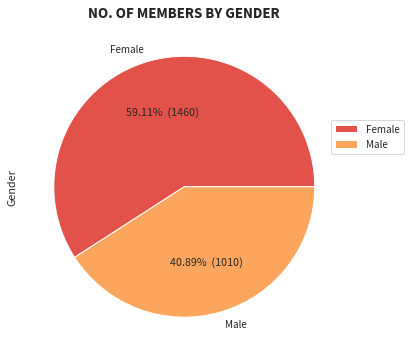

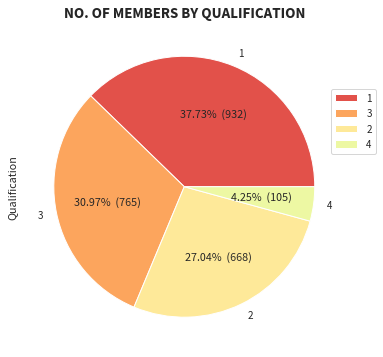

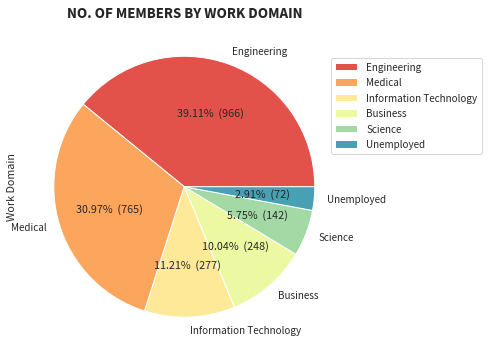

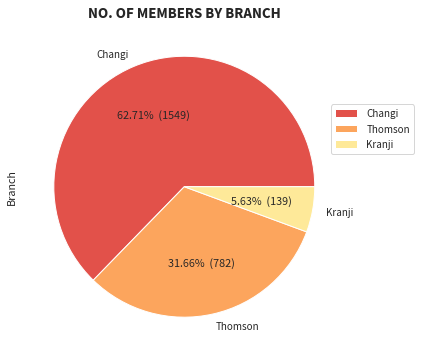

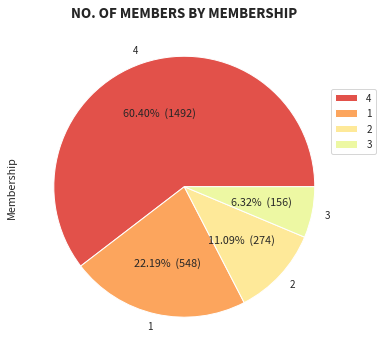

In [219]:
for c in cat_cols:
    plotpie(c)

In [246]:
def plotpie_attrition(col):
    
    value = df_attr[col].value_counts()
    label_value = df_attr[col].unique()
    
    #set size of plot
    plt.figure(figsize=(10,6))
    
    # specify the custom font to use
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'source sans pro'
    
    #set title of plot
    plt.title("NO. OF MEMBERS BY " + col.upper(), fontsize = 15,fontweight='bold')
    

    # Create Customzied Pie Chart
    value.plot.pie(labels = label_value, autopct=make_autopct(value))
    
    #legend
    plt.legend(loc=(0.95,0.6))
    plt.show()

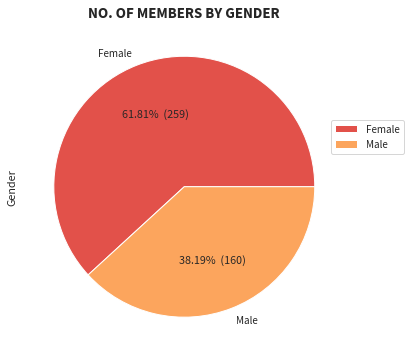

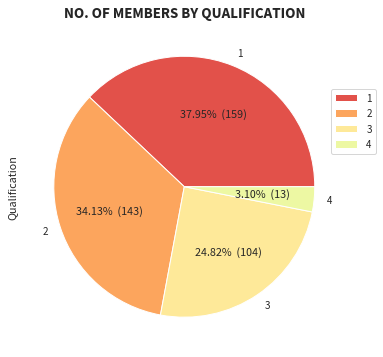

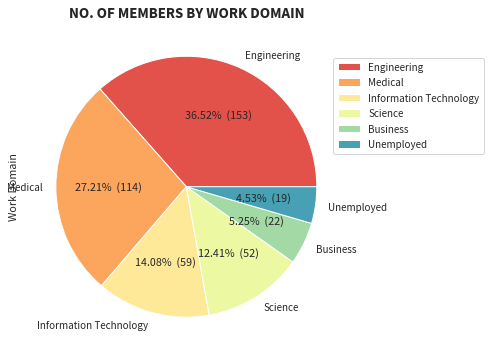

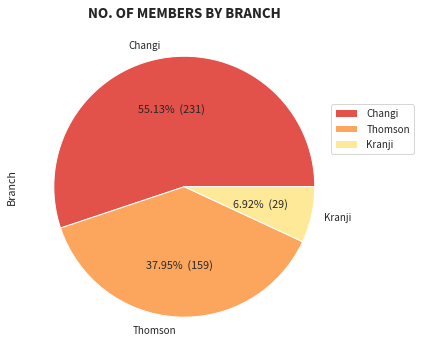

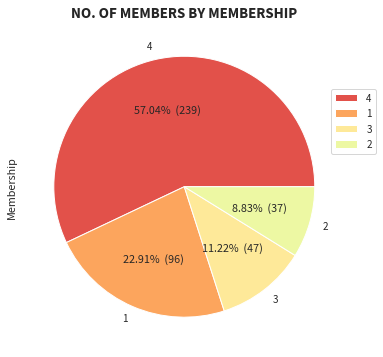

In [248]:
#profile of people who quit

for c in cat_cols:
    plotpie_attrition(c)
    
#observations:
#more females (61%)
#mostly bachelor/diploma holders
#mostly engineering and bachelors
#most gold memebership
#most from changi branch

In [35]:
 #to check spread, central tendency , dispersion and outliers  

def histogram_spread(df_col):

    
    #Adjusting plot size
    #plt.figure(figsize=(10, 5))
   
    Name=df_col.name.upper()
    fig, axes =plt.subplots(1,2,figsize=(20, 6))

    fig.suptitle("SPREAD OF DATA BY "+ Name, fontsize=18, fontweight='bold')
    sns.distplot(df_col,kde=False,ax=axes[0])
    
    min_ylim, max_ylim = plt.ylim()
    
    axes[0].axvline(df_col.mean(), linestyle='solid',linewidth=2)
    axes[0].text(df_col.mean()*1.02, max_ylim, 'Mean: {:,.2f}'.format(df_col.mean()))
    axes[0].axvline(df_col.median(), linestyle='dashed', linewidth=2)
    axes[0].axvline(df_col.mode()[0],linestyle=':',linewidth=2)
    axes[0].legend({'Mean':df_col.mean(),'Median':df_col.median(),'Mode':df_col.mode()})
    
    sns.boxplot(x=df_col,showmeans=True, orient='h', ax=axes[1])


In [220]:
num_cols = [c for c in df.columns if df[c].dtypes !='O']

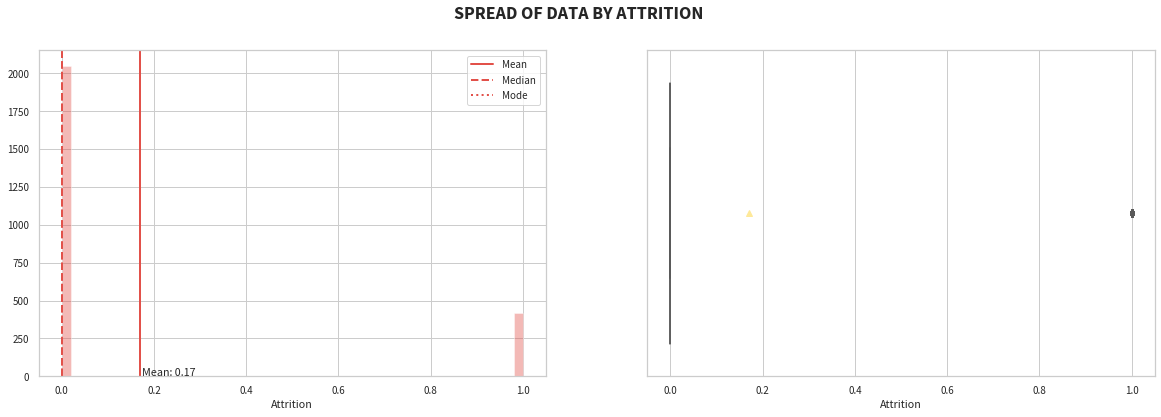

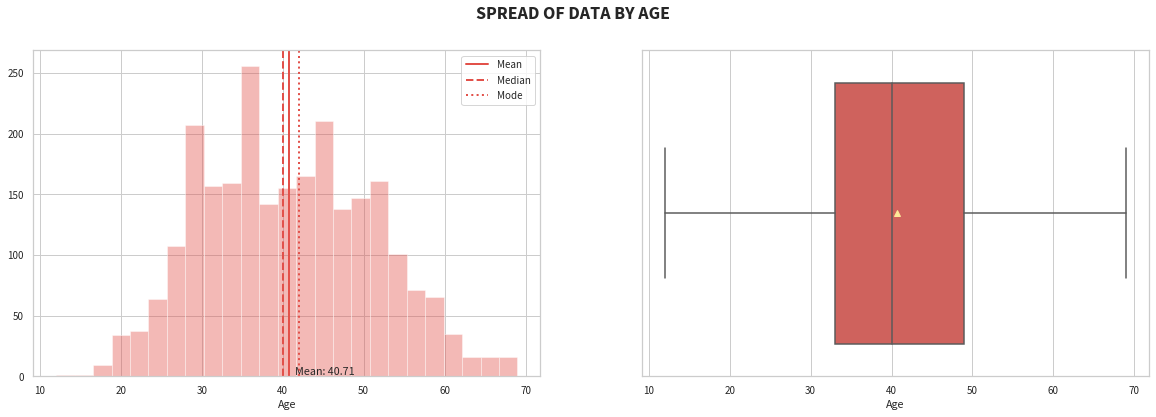

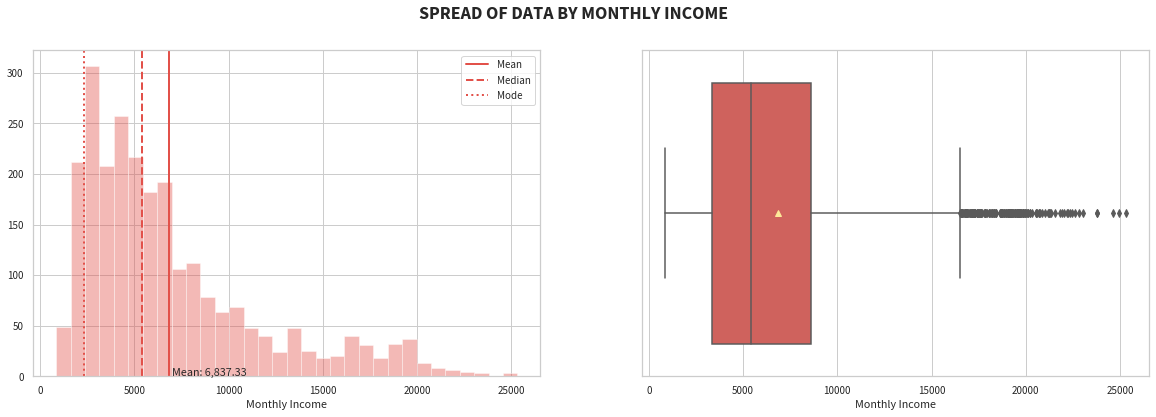

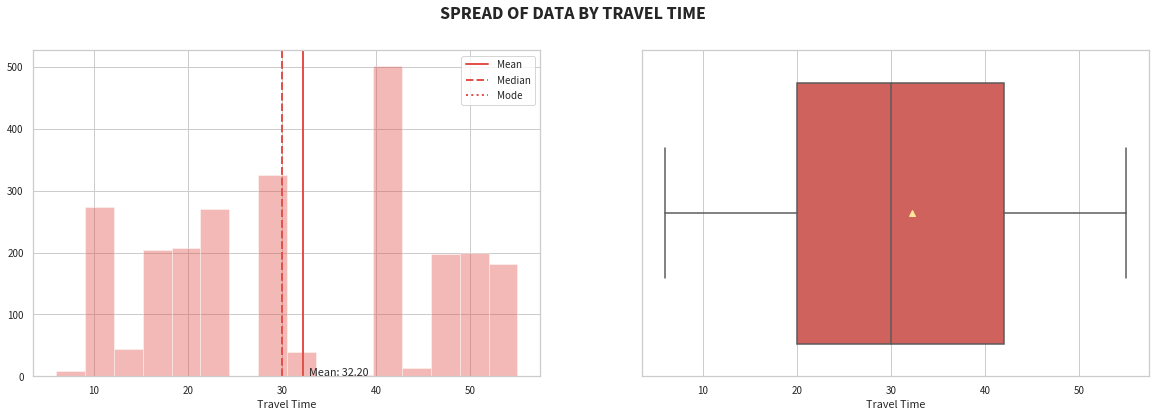

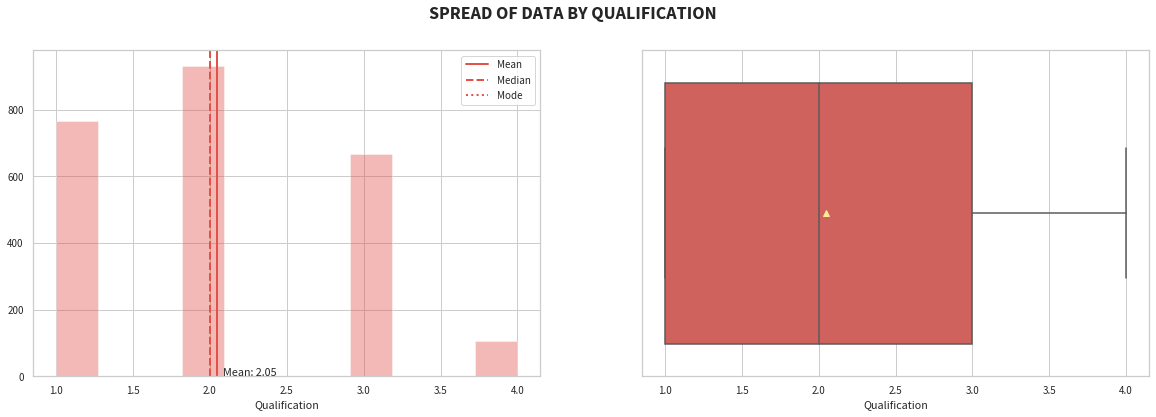

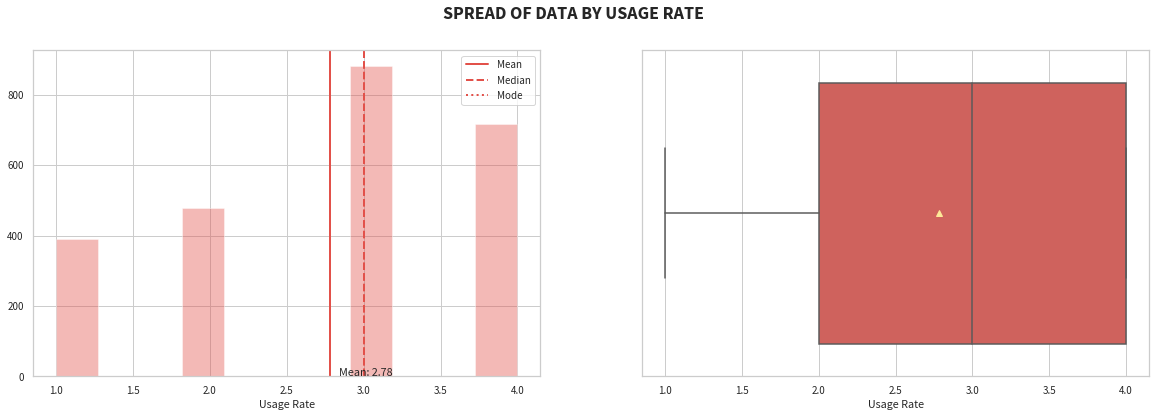

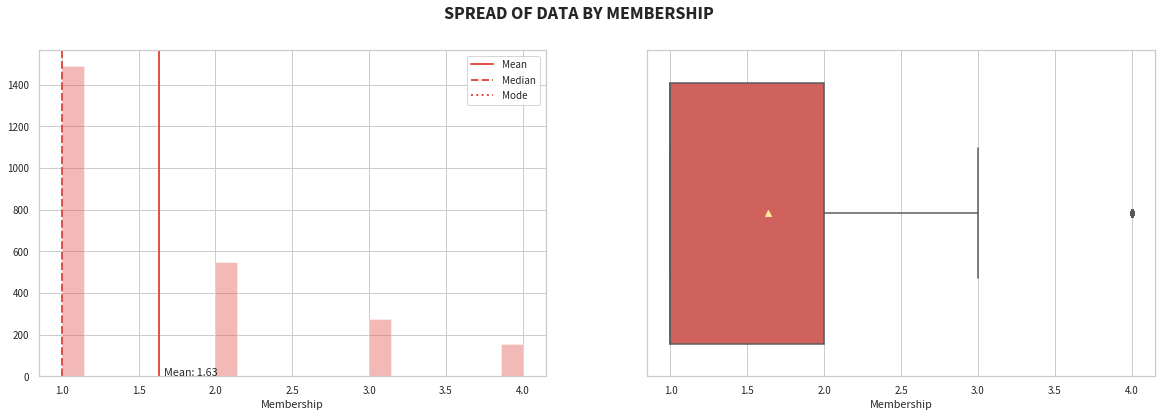

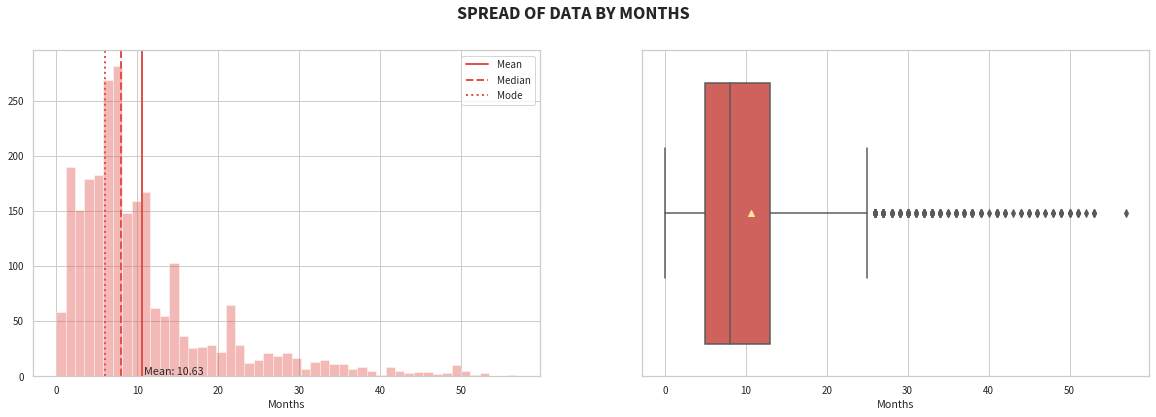

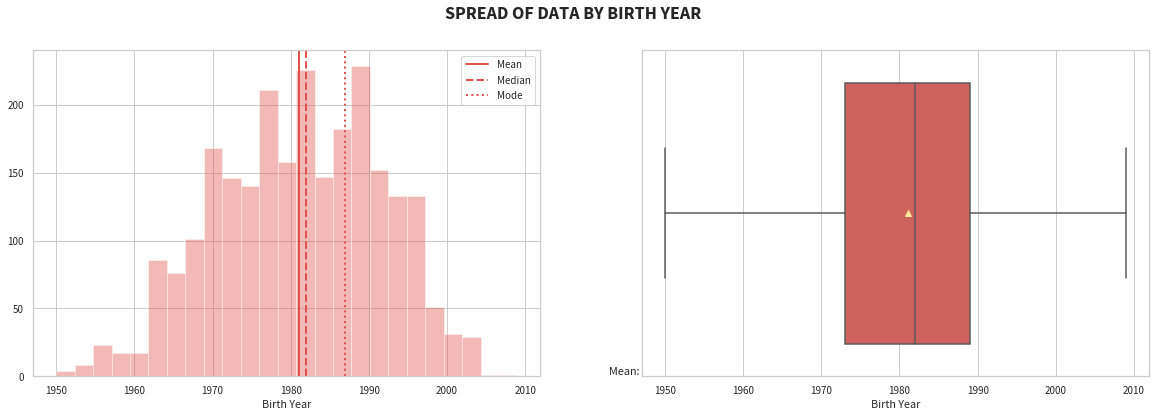

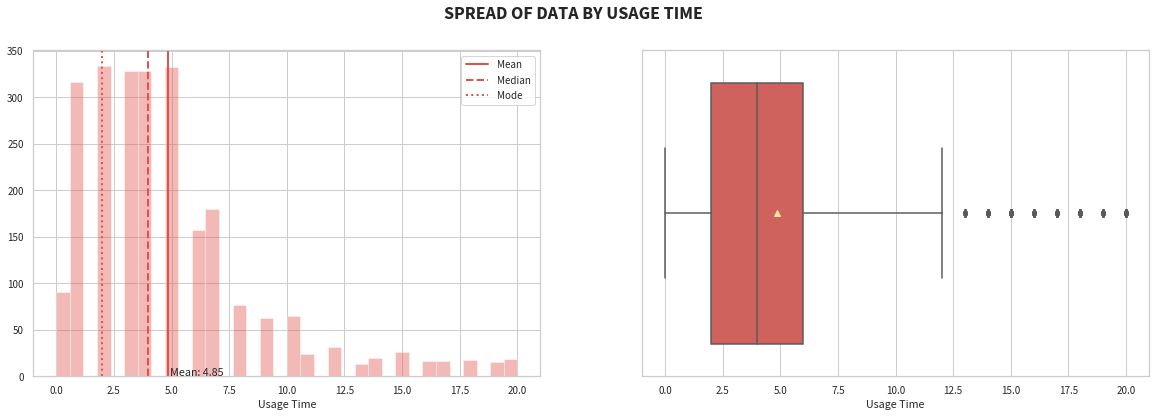

In [222]:
#profile of memebers all

for c in num_cols:
    histogram_spread(df[c])
    


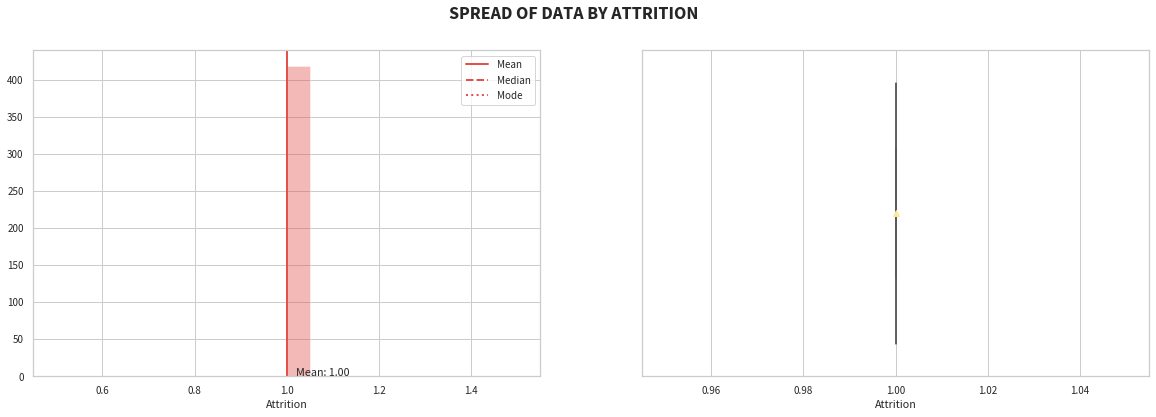

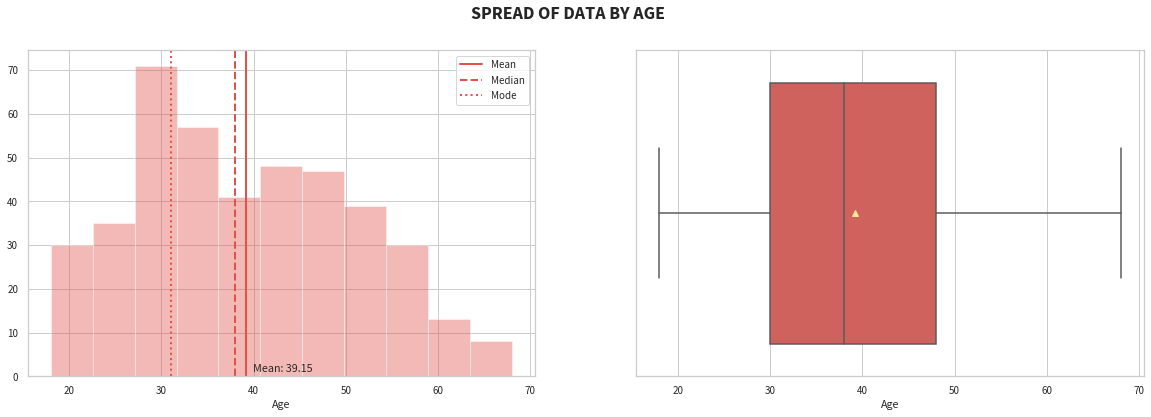

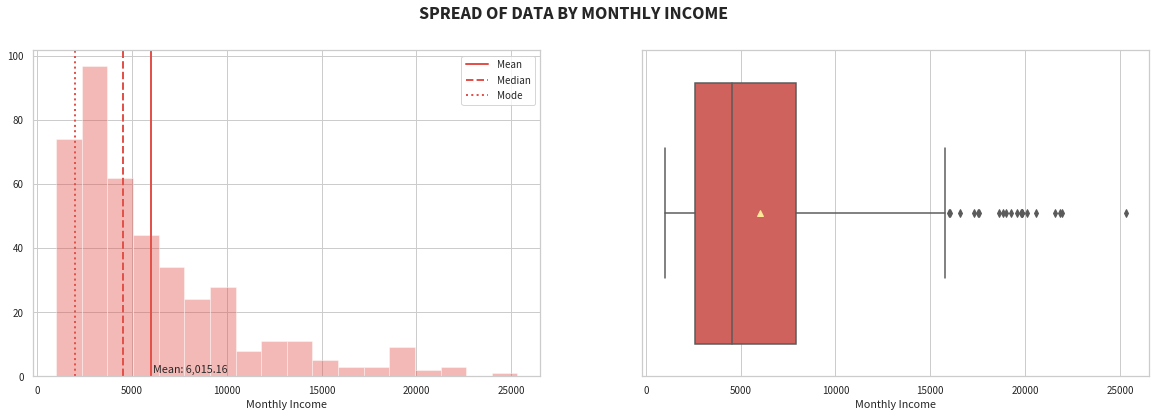

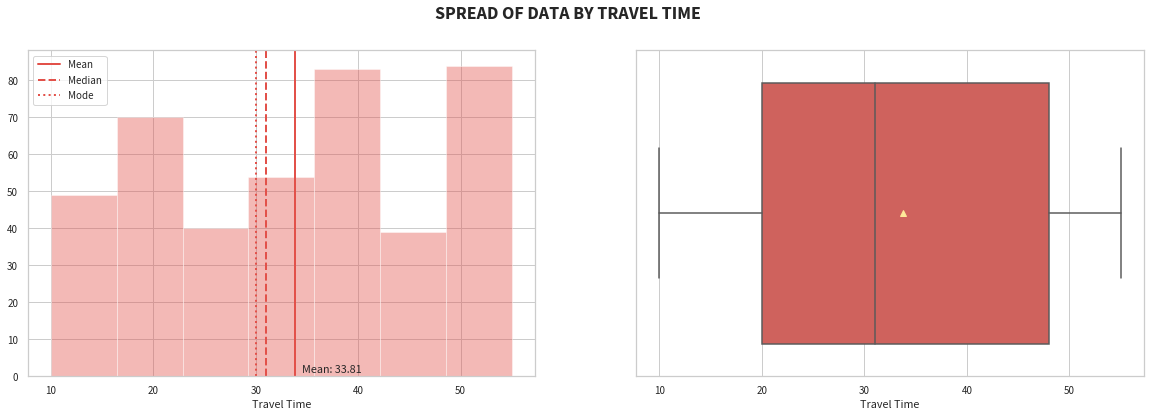

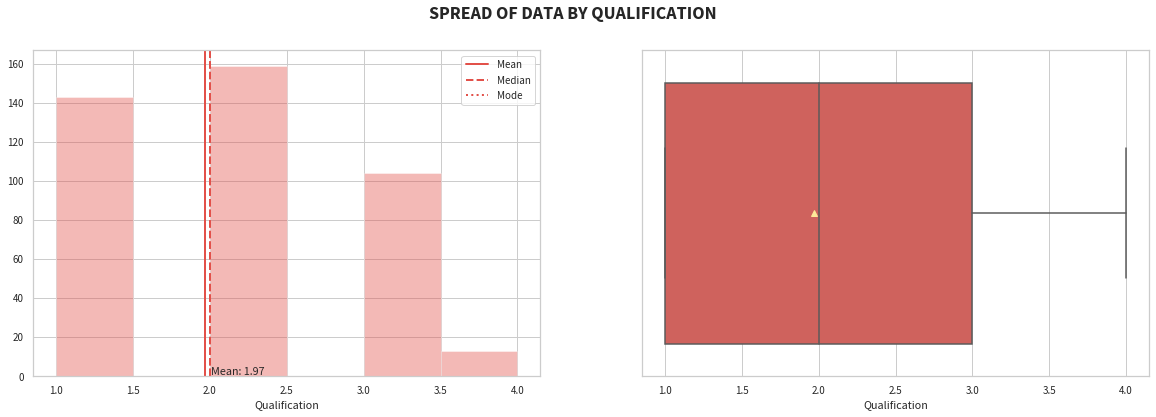

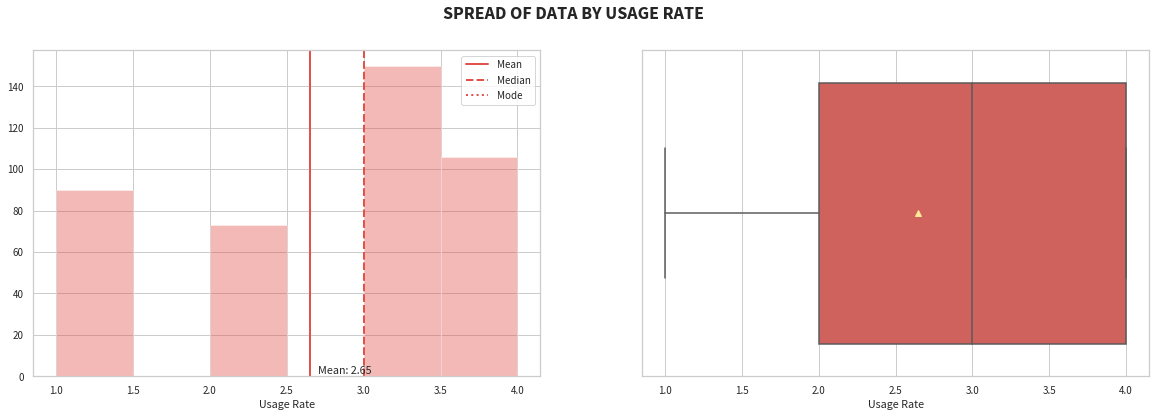

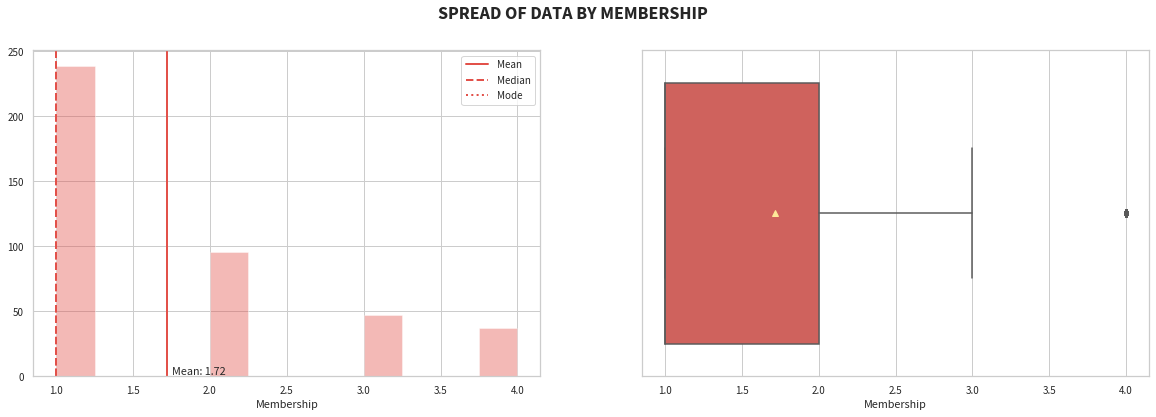

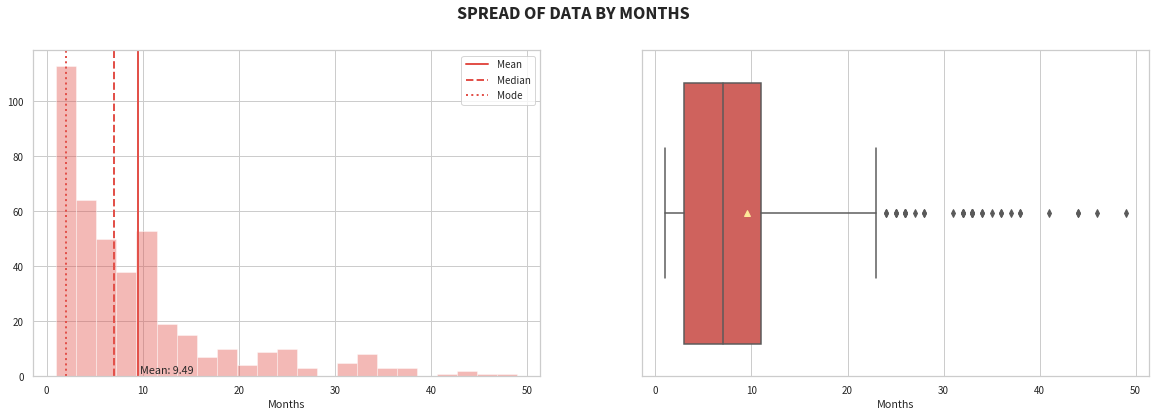

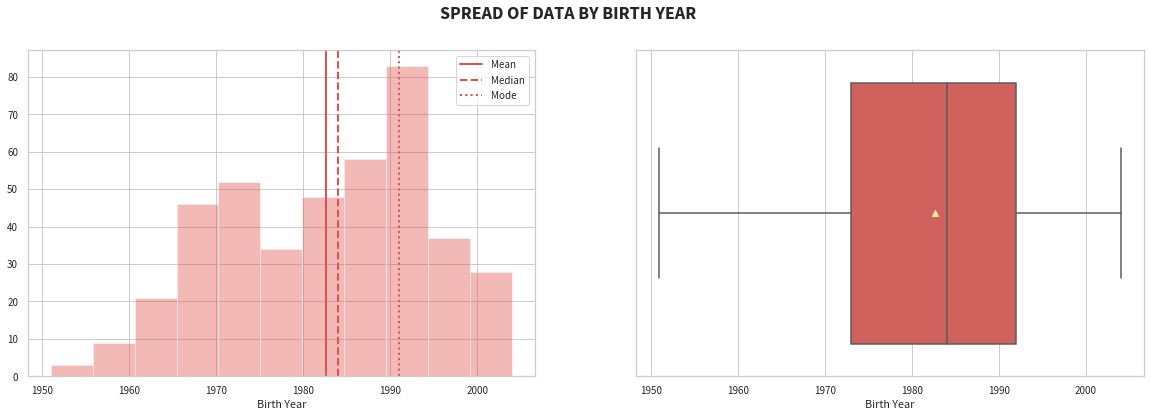

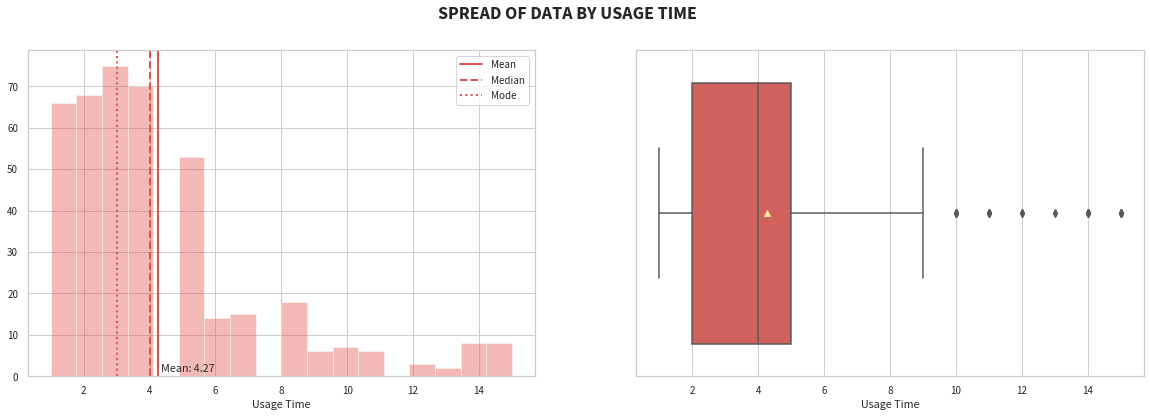

In [249]:
#profile of memebers who quit

for c in num_cols:
    histogram_spread(df_attr[c])

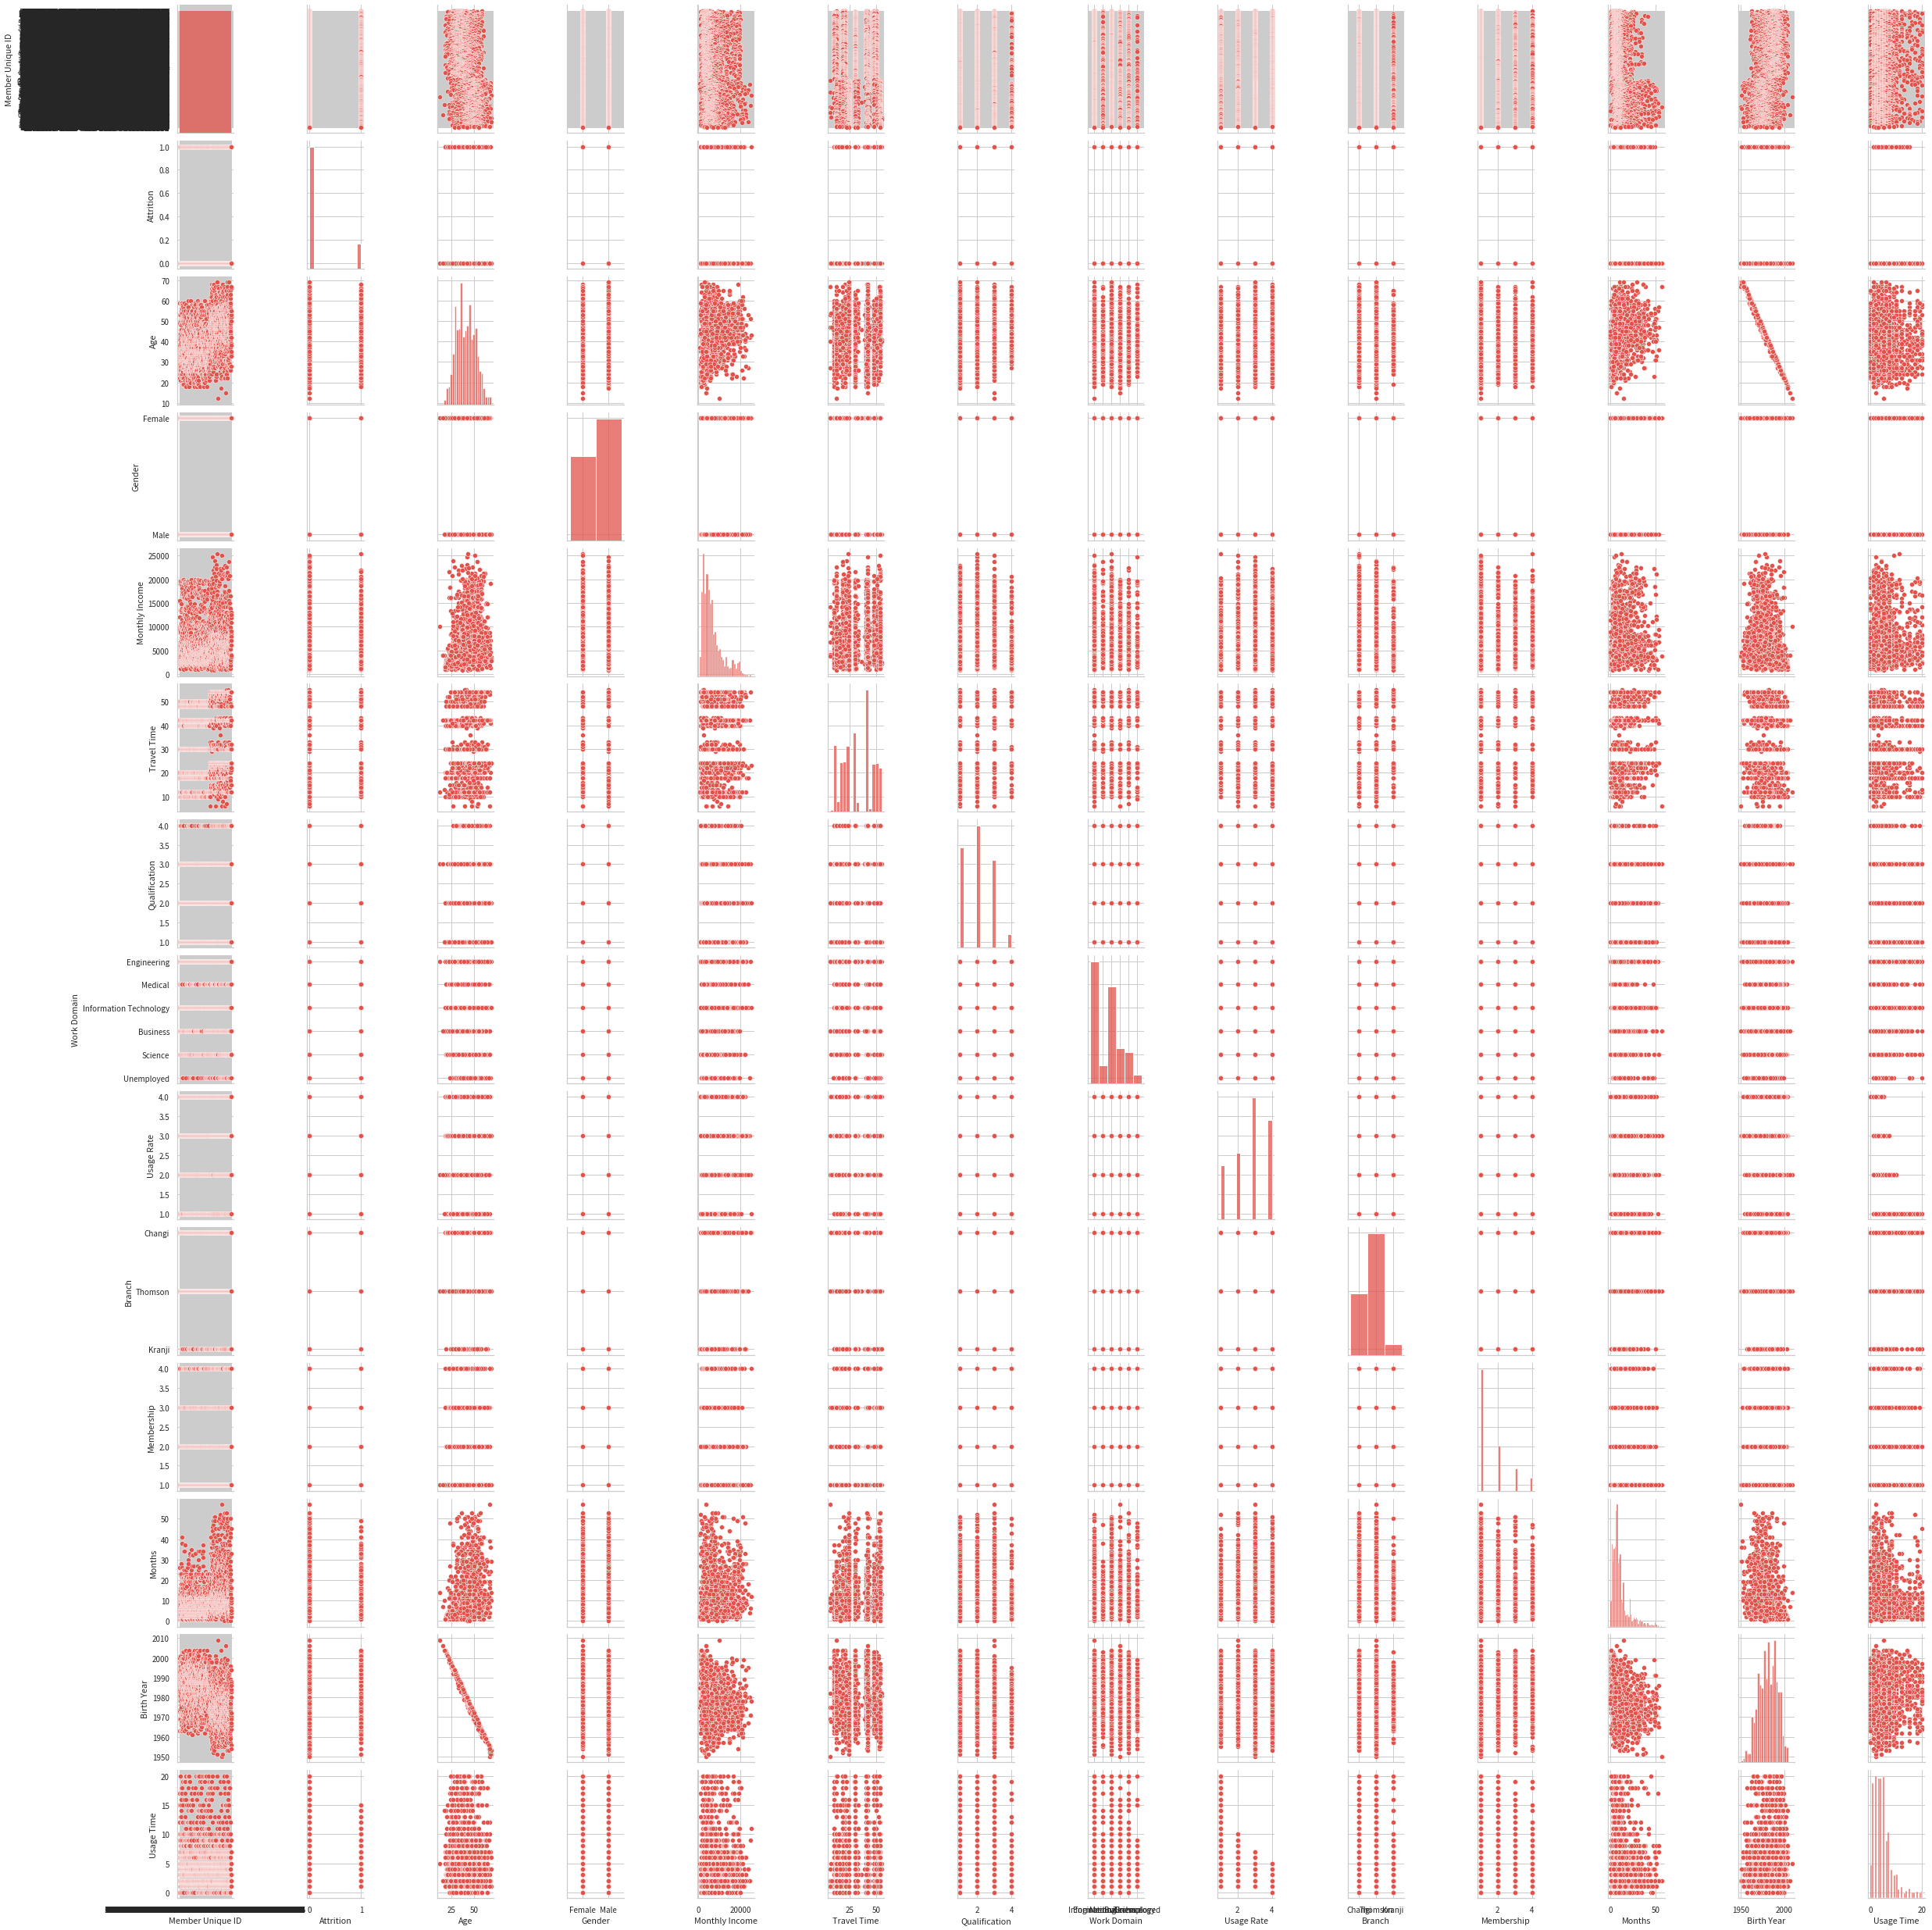

In [223]:
 sns.pairplot(df, vars=df.columns[:])

## 4.2 Bi-Variate Analysis

In [233]:
def compare_chart(a ,y):
    value = pd.crosstab(df[a],df[y]) 
    perc = pd.crosstab(df[a],df[y], normalize='index')
    print(value)
    print()
    print(perc)
    print()
    
    
    x = value.plot(kind ='bar').legend(loc='upper right')
    plt.title(y.upper() + " BY " + a.upper())
    plt.xlabel(a.upper())
    plt.ylabel("No. of members")

Attrition     0    1
Branch              
Changi      623  159
Kranji      110   29
Thomson    1318  231

Attrition         0         1
Branch                       
Changi     0.796675  0.203325
Kranji     0.791367  0.208633
Thomson    0.850872  0.149128



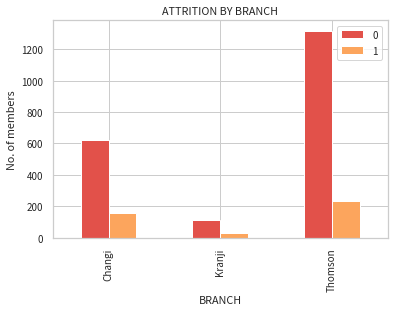

In [234]:
compare_chart('Branch', 'Attrition')
#Thompson branch has the lowest attrition rate of 14%

Attrition      0    1
Membership           
1           1253  239
2            452   96
3            227   47
4            119   37

Attrition          0         1
Membership                    
1           0.839812  0.160188
2           0.824818  0.175182
3           0.828467  0.171533
4           0.762821  0.237179



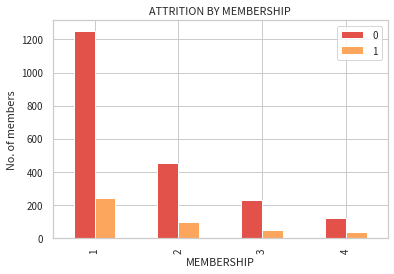

In [235]:
compare_chart('Membership','Attrition')

#Gold membership has the highest attrition rate (23.7%)

Attrition                 0    1
Work Domain                     
Business                218   59
Engineering             813  153
Information Technology  651  114
Medical                 120   22
Science                 196   52
Unemployed               53   19

Attrition                      0         1
Work Domain                               
Business                0.787004  0.212996
Engineering             0.841615  0.158385
Information Technology  0.850980  0.149020
Medical                 0.845070  0.154930
Science                 0.790323  0.209677
Unemployed              0.736111  0.263889



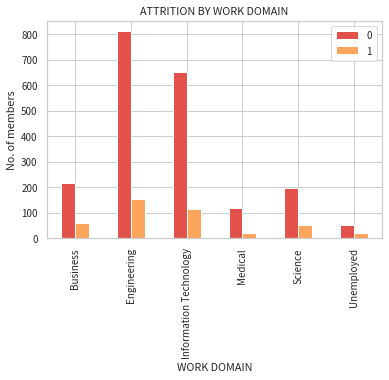

In [236]:
compare_chart('Work Domain','Attrition')
#Unemployed has the highest attrition rate (26.3% followe by business at 21.2%)

Attrition     0    1
Usage Rate          
1           300   90
2           406   73
3           733  150
4           612  106

Attrition          0         1
Usage Rate                    
1           0.769231  0.230769
2           0.847599  0.152401
3           0.830125  0.169875
4           0.852368  0.147632



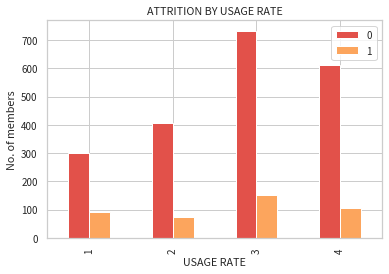

In [238]:
compare_chart('Usage Rate','Attrition')

Attrition        0    1
Qualification          
1              622  143
2              773  159
3              564  104
4               92   13

Attrition             0         1
Qualification                    
1              0.813072  0.186928
2              0.829399  0.170601
3              0.844311  0.155689
4              0.876190  0.123810



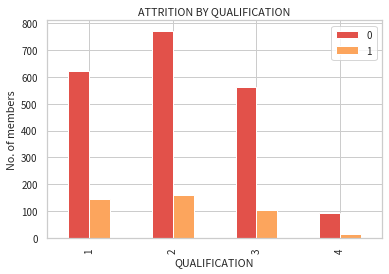

In [239]:
compare_chart('Qualification','Attrition')

#Diploma and Bachelor holders have the higher attrition rate (18.6% and 17.0%)

Attrition     0    1
Gender              
Female      850  160
Male       1201  259

Attrition         0         1
Gender                       
Female     0.841584  0.158416
Male       0.822603  0.177397



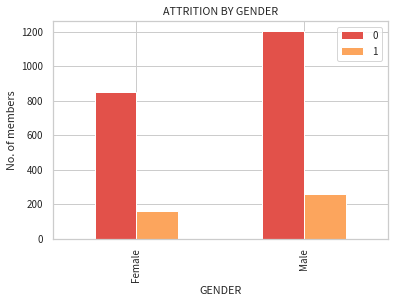

In [296]:
compare_chart('Gender','Attrition')

In [240]:
def kdeplot_2(x, y):
    sns.kdeplot(
   data=df, x=y, hue=x,
   fill=True, common_norm=False, palette="crest",
   alpha=.3, linewidth=1
    )
    
    plt.title( x.upper() +" VS " + y.upper())
    plt.xlabel(y.upper())

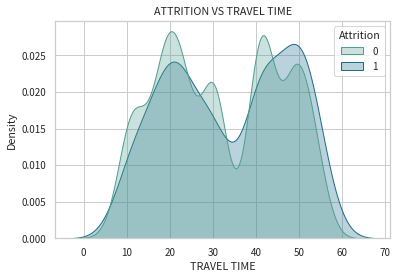

In [241]:
kdeplot_2('Attrition' ,'Travel Time')
#The longer the travel time the more likely the attrition rate (above 45 mins)

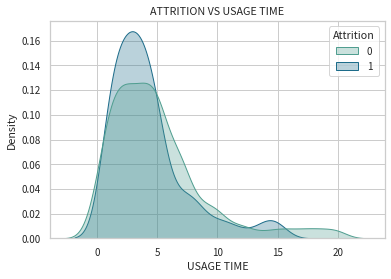

In [242]:
kdeplot_2('Attrition' ,'Usage Time')
#most people who do quit the club use it around 2-3 hours

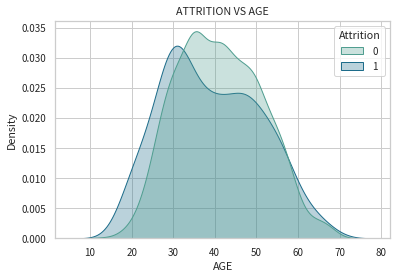

In [243]:
kdeplot_2('Attrition' ,'Age')
#most people who do quit the club jpin the club below 30

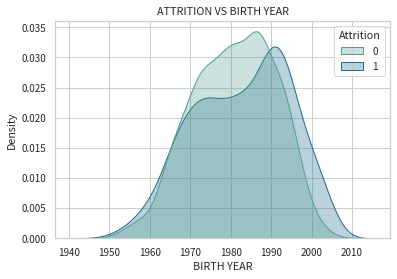

In [244]:
kdeplot_2('Attrition' ,'Birth Year')

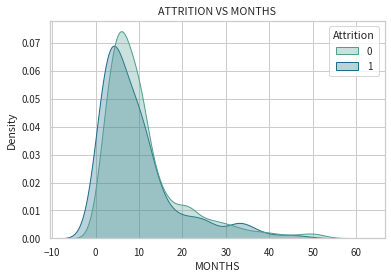

In [297]:
kdeplot_2('Attrition' ,'Months')

## 4.4 Multi-variate Analysis

In [291]:
def scatter_plot_1(x,y,z,a):
    sns.relplot(x=x, y=a, hue=y, size= z,
            sizes=(40, 400), alpha=.5, height=6, data = df).set(title= a.upper() + ' BY ' + x.upper() +', ' + y.upper() +', ' + z.upper());

In [294]:
def scatter_plot_attr(x,y,z,a):
    sns.relplot(x=x, y=a, hue=y, size= z,
            sizes=(40, 400), alpha=.5, height=6, data = df_attr).set(title= a.upper() + ' BY ' + x.upper() +', ' + y.upper() +', ' + z.upper());

In [269]:
def Attrition_plot(x,y):
    
    fig, ax = plt.subplots(1,2, figsize=(10,6), constrained_layout=True)
    
    ax1 = sns.regplot(x=x, y=y, data=df[df["Attrition"]== 1], ax=ax[0])
    ax1.set_title("Quit")
    ax2 = sns.regplot(x=x, y=y, data=df[df["Attrition"]==0] ,ax=ax[1])
    ax2.set_title("Didn't Quit")
    
    fig.suptitle("DISTRIBUTION OF MEMBERS BASED ON " + x.upper() + " AND " + y.upper() + " By Attrition status", fontsize=18)

    # Display the plot
    plt.show()

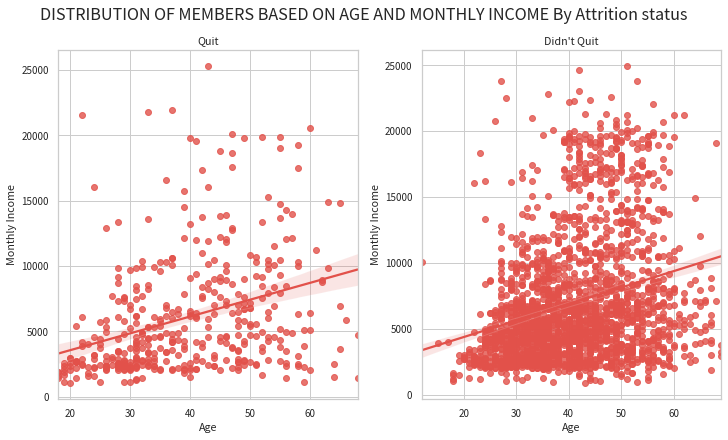

In [270]:
Attrition_plot('Age','Monthly Income')

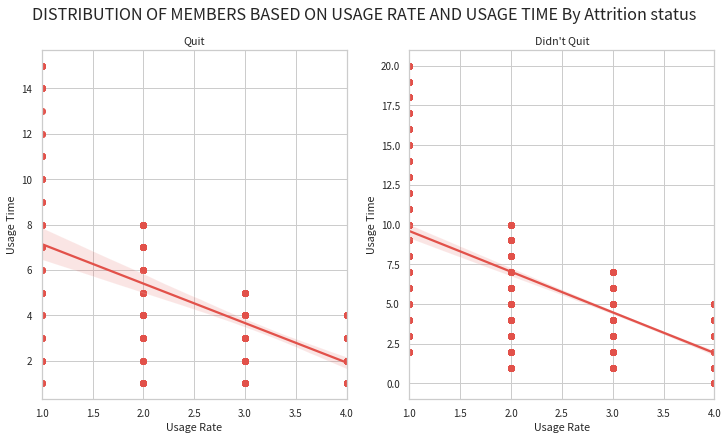

In [271]:
Attrition_plot('Usage Rate','Usage Time')
#people who quit the club usually spent less than 8 hours at the club

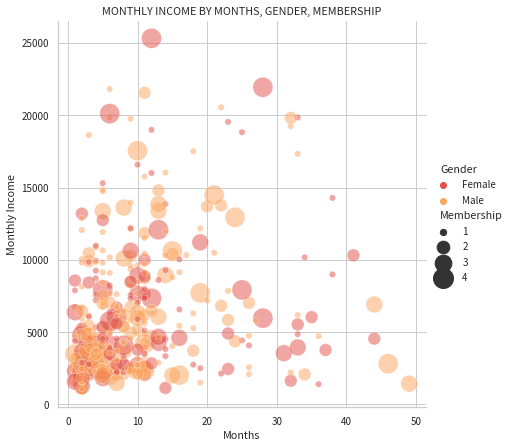

In [295]:
#scatter plot of the profile of users who quit by age gender mebershio and montly income
scatter_plot_attr('Months','Gender', 'Membership', 'Monthly Income')

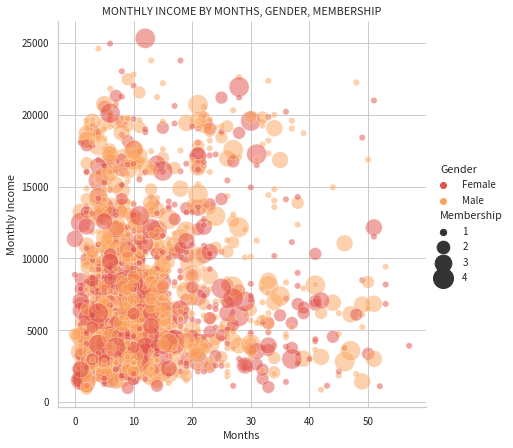

In [293]:
scatter_plot_1('Months','Gender', 'Membership', 'Monthly Income')

In general, the correlation between different attributes are not very strong. 
however, it can still be observed that:

1. Members who joined at a younger age (and hence have lower qualifications and lower income) are likely to quit the club
2. Members who use the country club lesser (a new feature can be created Usage Time * Usage Rate) are likely to quit the club
3. Members who have a longer travel time are likely to quit the club